In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd


In [13]:
# Adding a column to track location before combining
dataframes = [
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Wanshouxigong_20130301-20170228.csv").assign(site_name="Wanshouxigong"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Aotizhongxin_20130301-20170228.csv").assign(site_name="Aotizhongxin"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Changping_20130301-20170228.csv").assign(site_name="Changping"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Dingling_20130301-20170228.csv").assign(site_name="Dingling"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Dongsi_20130301-20170228.csv").assign(site_name="Dongsi"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Guanyuan_20130301-20170228.csv").assign(site_name="Guanyuan"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Gucheng_20130301-20170228.csv").assign(site_name="Gucheng"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Huairou_20130301-20170228.csv").assign(site_name="Huairou"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Nongzhanguan_20130301-20170228.csv").assign(site_name="Nongzhanguan"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Shunyi_20130301-20170228.csv").assign(site_name="Shunyi"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Wanliu_20130301-20170228.csv").assign(site_name="Wanliu"),
    pd.read_csv("/content/drive/MyDrive/programming/PRSA_Data_Tiantan_20130301-20170228.csv").assign(site_name="Tiantan"),
]

combined_data = pd.concat(dataframes, ignore_index=True)

# Saving combined data with location info in Colab
output_path = "combined_air_quality_with_location.csv"
combined_data.to_csv(output_path, index=False)
print(f"Combined dataset saved with location info: {output_path}")


Combined dataset saved with location info: combined_air_quality_with_location.csv


In [14]:
# Basic Information
print("Dataset Shape:", combined_data.shape)
print("\nFirst 5 Rows:\n", combined_data.head())
print("\nColumn Data Types:\n", combined_data.dtypes)

# Summary statistics for numerical columns
print("\nSummary Statistics:\n", combined_data.describe())

# Checking for missing values
missing_values = combined_data.isnull().sum()
missing_percentage = (missing_values / len(combined_data)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Percentage:\n", missing_percentage)

# Unique values in categorical columns
print("\nUnique Stations:", combined_data['station'].nunique())
print("Unique Site Names:", combined_data['site_name'].unique())


Dataset Shape: (420768, 19)

First 5 Rows:
    No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station      site_name  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  Wanshouxigong  

Column Data Types:
 No             int64
year           int64
month          int64
day            int64
hour

In [15]:
# Handling missing values
# Fill numerical columns with their median and categorical with mode
combined_data.fillna(combined_data.median(numeric_only=True), inplace=True)

# Checking for duplicate entries
duplicates = combined_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
combined_data = combined_data.drop_duplicates()

# Ensure 'datetime' column is created
combined_data['datetime'] = pd.to_datetime(combined_data[['year', 'month', 'day', 'hour']])

# Drop the original 'year', 'month', 'day', 'hour' columns
combined_data.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

# If attempting to use 'date', replace it with 'datetime'
# Example: Extract season from 'datetime'
combined_data['season'] = combined_data['datetime'].dt.month % 12 // 3 + 1  # 1: Winter, 2: Spring, etc.

# Ensure there are no references to 'date' in the code



Number of duplicate rows: 0


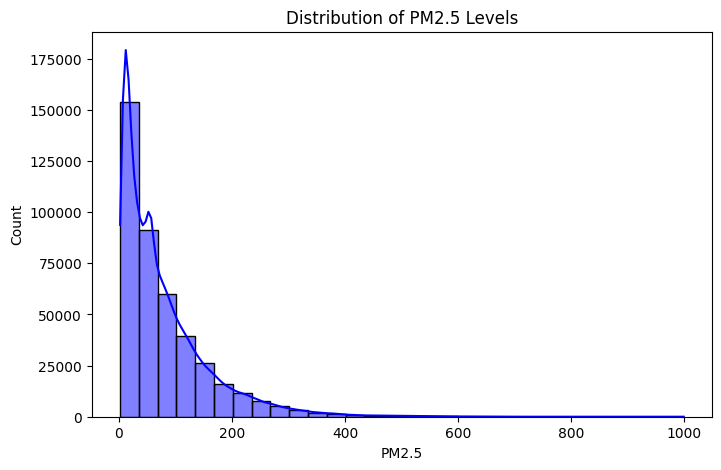

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis: Distribution of PM2.5
plt.figure(figsize=(8, 5))
sns.histplot(combined_data['PM2.5'], kde=True, bins=30, color='blue')
plt.title("Distribution of PM2.5 Levels")
plt.xlabel("PM2.5")
plt.show()



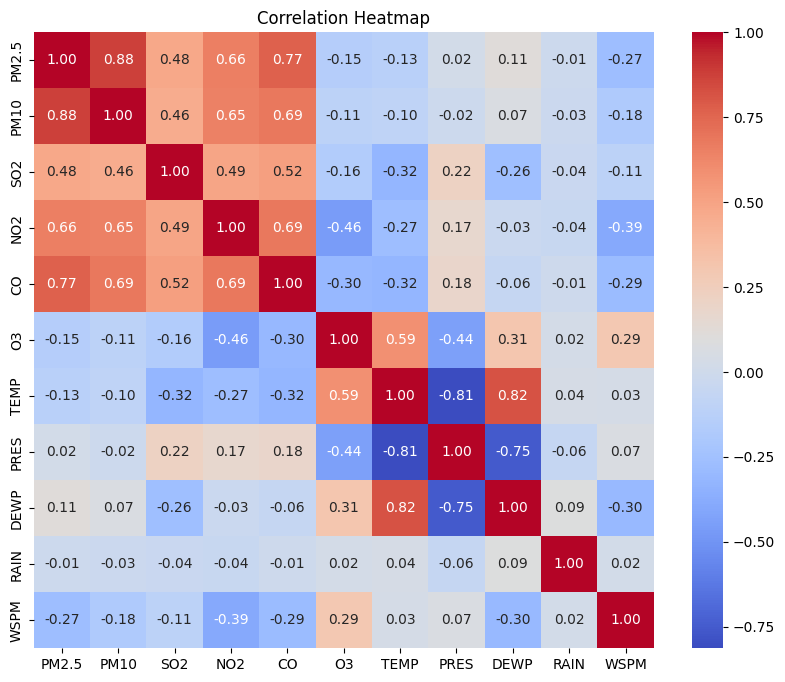

In [17]:
# Define numerical columns explicitly
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Bivariate Analysis: Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = combined_data[numerical_cols].corr()  # Compute correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


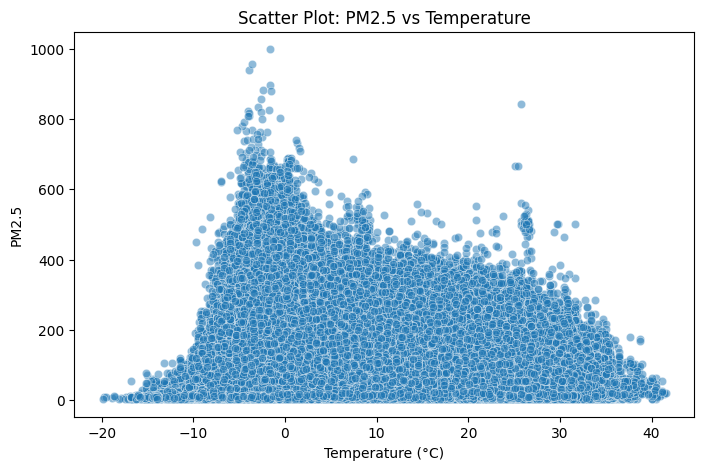

In [18]:
# Scatter Plot: PM2.5 vs Temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined_data['TEMP'], y=combined_data['PM2.5'], alpha=0.5)
plt.title("Scatter Plot: PM2.5 vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5")
plt.show()


<ipython-input-19-1dc07ed0394d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=combined_data['season'], y=combined_data['PM2.5'], palette="Set2")


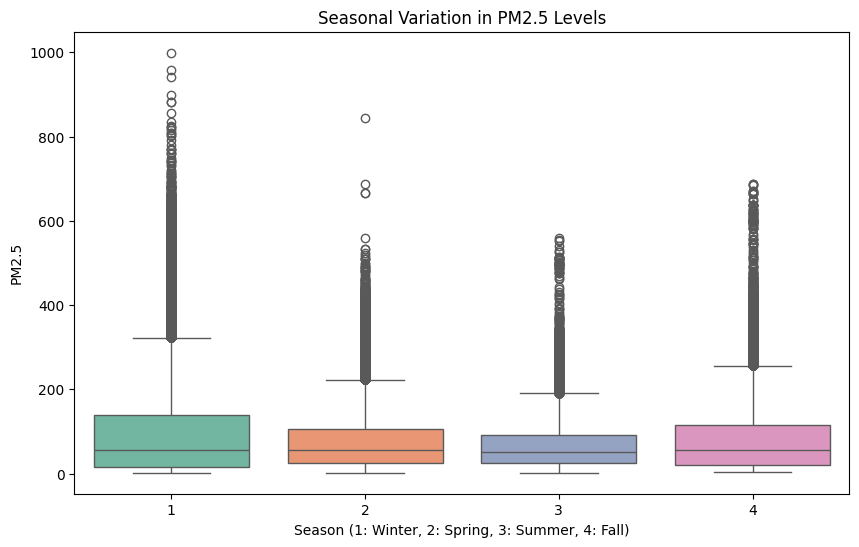

In [19]:
# Multivariate Analysis: Seasonal Variation in PM2.5
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_data['season'], y=combined_data['PM2.5'], palette="Set2")
plt.title("Seasonal Variation in PM2.5 Levels")
plt.xlabel("Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)")
plt.ylabel("PM2.5")
plt.show()

<ipython-input-20-cee9e80c4309>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="site_name", y="PM2.5", data=combined_data, ci=None, palette="viridis")
<ipython-input-20-cee9e80c4309>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="site_name", y="PM2.5", data=combined_data, ci=None, palette="viridis")


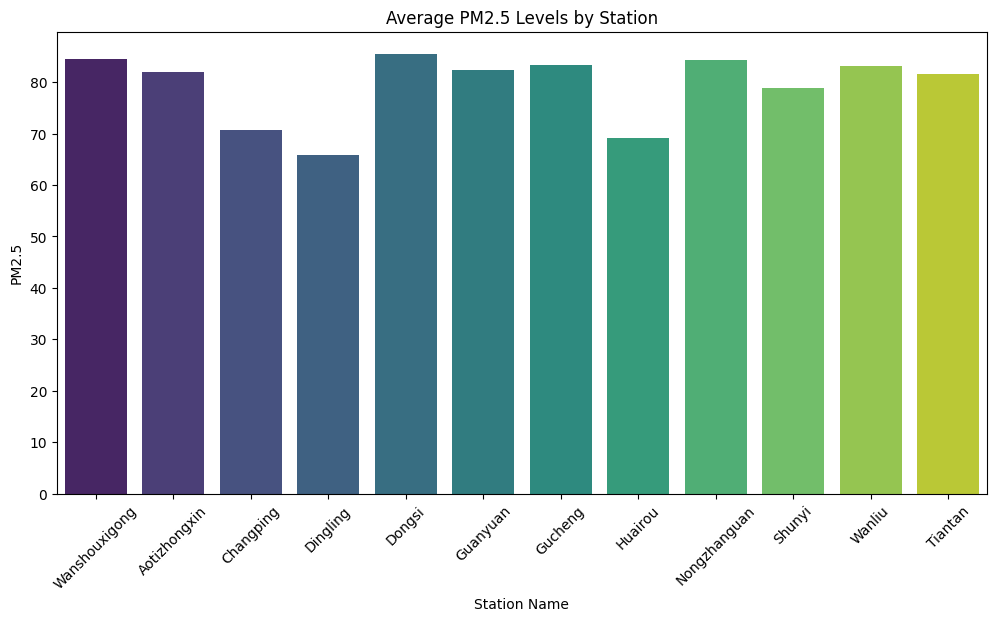

In [20]:
# Station-Wise PM2.5 Levels
plt.figure(figsize=(12, 6))
sns.barplot(x="site_name", y="PM2.5", data=combined_data, ci=None, palette="viridis")
plt.title("Average PM2.5 Levels by Station")
plt.xticks(rotation=45)
plt.xlabel("Station Name")
plt.ylabel("PM2.5")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

# Define target and features
X = combined_data.drop(columns=['PM2.5', 'datetime'])  # Drop target and non-predictive columns
y = combined_data['PM2.5']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (336614, 15)
Test set size: (84154, 15)


# 4. Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
numerical_cols = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
categorical_cols = ['station', 'site_name']  # Adjust if needed

# Preprocessing pipeline: encode categorical and scale numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),          # Scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ])

# Apply preprocessing to training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


5. Model Selection
Try multiple algorithms and compare their performance:

Linear Regression:

In [27]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model using preprocessed training data
lr_model.fit(X_train_processed, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test_processed)

# Evaluate the model performance
print("Linear Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
Mean Squared Error (MSE): 1017.9275357142951
R² Score: 0.8415680718436765


RANDOM FOREST

In [29]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

#  Train the model using preprocessed training data
rf_model.fit(X_train_processed, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_processed)

#  Evaluate the model performance
print("Random Forest Regressor:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
Mean Squared Error (MSE): 445.5756086555601
R² Score: 0.9306498740411897


In [31]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

#  Train the model using preprocessed training data
gb_model.fit(X_train_processed, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test_processed)

#  Evaluate the model performance
print("Gradient Boosting Regressor:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("R² Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting Regressor:
Mean Squared Error (MSE): 664.2610121785459
R² Score: 0.8966133155198818



Model Performance Metrics:
               Model          MSE        R2
0  Linear Regression  1017.927536  0.841568
1      Random Forest   445.575609  0.930650


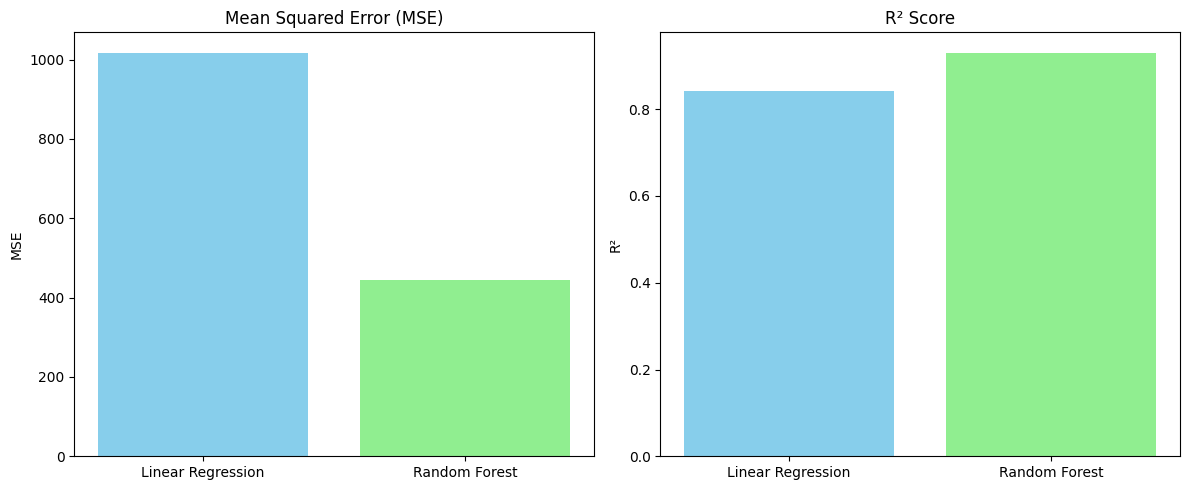

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Collect metrics for comparison
metrics = {
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_rf)
    ],
    'R2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
}

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Display metrics table
print("\nModel Performance Metrics:")
print(metrics_df)

# Plot MSE and R² comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for MSE
ax[0].bar(metrics['Model'], metrics['MSE'], color=['skyblue', 'lightgreen'])
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')

# Bar plot for R²
ax[1].bar(metrics['Model'], metrics['R2'], color=['skyblue', 'lightgreen'])
ax[1].set_title('R² Score')
ax[1].set_ylabel('R²')

plt.tight_layout()
plt.show()


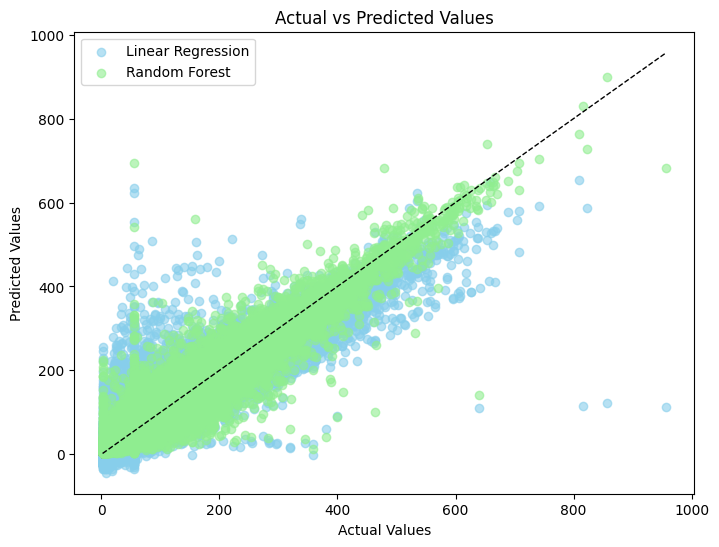

In [36]:
# Scatter plot for predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Linear Regression', color='skyblue')
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='lightgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', linewidth=1)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
